# Imaginative Networks
## A Social Network Analysis of Dedications in Early Modern Printed Books

John R. Ladd | 17 February 2020

In [11]:
# Begin by importing necessary libraries
import networkx as nx
from networkx.readwrite import json_graph
from networkx.algorithms import bipartite, community
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from pyvis.network import Network
import helper_functions as hf
from random import sample

plt.style.use('ggplot') # Automatically give all charts nice styling

# Read in the full initial graph from my named-entity recognition process
# with open('all_eebo.json', 'r') as jsonfile:
#     jsonstring = jsonfile.read()
#     data = json.loads(jsonstring)
#     print(data["nodes"][:100])
    
# for d in data["nodes"]:
#     keys = [k for k,v in d.items() if v == None]
#     for key in keys:
#         del d[key]
            
# print(data["nodes"][:100])
    

# Load this graph into a NetworkX object for easy analysis
# B = json_graph.node_link_graph(data)

B = nx.read_gpickle('../data/test_joined0826.pkl')
print(nx.info(B))
for n,d in B.nodes(data=True):
    try:
        if d['date'] == None:
            B.nodes[n]['date'] = 'No date listed'
    except KeyError:
        pass
    if d['bipartite'] == 'person':
        B.node[n]['displayname'] = B.node[n]['display_name']
        del B.node[n]['display_name']
nx.write_gml(B, "../data/test_joined0826.gml")

Name: 
Type: Graph
Number of nodes: 54679
Number of edges: 113862
Average degree:   4.1647


In [15]:
# As a test, create a subgraph for 1660
SB = hf.filter_by_year(1660, B)
print("Full Network for 1660")
print(nx.info(SB))
# nx.write_edgelist(SB, "1660_full.edgelist", data=False)
# nx.write_gml(SB, "1660_full.gml")

# Sort nodes by their degree to get the 10 people with the heighest degree
# Then print those names
nodes_by_degree = sorted(SB.nodes(data=True), key=lambda n:SB.degree(n[0]), reverse=True)
people_by_degree = [n for n in nodes_by_degree if type(n[0]) == int]
print("\nTop Ten People by Degree:\n")
for p in people_by_degree[:10]:
    print(p[0], p[1]['display_name'], SB.degree[p[0]])

# viz = hf.convert_nx(SB)
# viz.show_buttons()
# viz.show("year_graph.html")
# plt.figure(figsize=(20,20))
# pos = nx.spring_layout(SB, seed=25, iterations=25)
# nx.draw(SB, arrows=True, pos=pos, with_labels=True)
# plt.show()

Full Network for 1660
Name: 
Type: Graph
Number of nodes: 1496
Number of edges: 1972
Average degree:   2.6364

Top Ten People by Degree:

126033 God 144
104495 Jesus Christ 65
111734 David 26
101427 Charles Ii 20
108610 St Paul 19
133188 Moses 18
110832 St John 16
105361 King James 15
140498 King Charles 14
141874 Solomon 14


In [16]:
nodeset = [n[0] for n in SB.nodes(data=True) if type(n[0]) == int]
degree_centrality = bipartite.degree_centrality(SB, nodeset)
# Sort nodes by their degree to get the 10 people with the heighest degree
# Then print those names
nodes_by_degree = sorted(SB.nodes(data=True), key=lambda n:degree_centrality[n[0]], reverse=True)
people_by_degree = [n for n in nodes_by_degree if type(n[0]) == int]
print("\nTop Ten People by Degree Centrality:\n")
for p in people_by_degree[:10]:
    print(p[0], p[1]['display_name'], degree_centrality[p[0]])


Top Ten People by Degree Centrality:

126033 God 0.64
104495 Jesus Christ 0.28888888888888886
111734 David 0.11555555555555555
101427 Charles Ii 0.08888888888888889
108610 St Paul 0.08444444444444445
133188 Moses 0.08
110832 St John 0.07111111111111111
105361 King James 0.06666666666666667
140498 King Charles 0.06222222222222222
141874 Solomon 0.06222222222222222


In [17]:
# components = nx.connected_components(SB)
# largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

# SB = SB.subgraph(largest_component)
# SB_component = SB
nodeset = [n[0] for n in SB.nodes(data=True) if type(n[0]) == int]
betweenness = bipartite.betweenness_centrality(SB, nodeset)

# print(betweenness)

nodes_by_bw = sorted(SB.nodes(data=True), key=lambda n:betweenness[n[0]], reverse=True)
people_by_bw = [n for n in nodes_by_bw if type(n[0]) == int]
print("\nTop Ten People by Betweenness:\n")
for p in people_by_bw[:10]:
    print(p[0], p[1]['display_name'], SB.degree[p[0]], betweenness[p[0]])


Top Ten People by Betweenness:

126033 God 144 0.5527393034809875
104495 Jesus Christ 65 0.11495542605257551
108610 St Paul 19 0.02589229067313091
112509 St Thomas 8 0.01984631921859974
132630 Maecenas 3 0.018214504008916693
111734 David 26 0.0173661674452946
115297 King Henry 12 0.01726588905654387
105361 King James 15 0.015778267677120518
112174 Alexander 6 0.013133312517533227
101427 Charles Ii 20 0.011207752284977704


In [18]:
degree = bipartite.degree_centrality(SB, nodeset)
bd = {}

for k,v in betweenness.items():
      try:
          bd[k] = v/degree[k]
      except ZeroDivisionError:
          bd[k] = 0
nodes_by_bd = sorted(SB.nodes(data=True), key=lambda n:bd[n[0]], reverse=True)
people_by_bd = [n for n in nodes_by_bd if type(n[0]) == int]
print("\nTop Ten People by Betweenness/Degree:\n")
for p in people_by_bd[:10]:
    print(p[0], p[1]['display_name'], bd[p[0]], betweenness[p[0]], degree[p[0]])


Top Ten People by Betweenness/Degree:

132630 Maecenas 1.366087800668752 0.018214504008916693 0.013333333333333332
104552 Vespasian 0.9598479128465107 0.00853198144752454 0.008888888888888889
126033 God 0.863655161689043 0.5527393034809875 0.64
137792 Thomas Bodley 0.6866168698090821 0.006103261064969619 0.008888888888888889
113701 John Earnly 0.6866168698090821 0.006103261064969619 0.008888888888888889
132460 Plato 0.6215369891050022 0.008287159854733363 0.013333333333333332
133382 Hippocrates 0.6156090839756988 0.008208121119675983 0.013333333333333332
134423 St James 0.5781933150610399 0.01027899226775182 0.017777777777777778
112509 St Thomas 0.5581777280231177 0.01984631921859974 0.035555555555555556
112708 Galen 0.5470656699324697 0.004862805954955286 0.008888888888888889


In [19]:
# Create a subset of the graph by looking for edges that I've already labeled "body"
body_subgraph = B.edge_subgraph([(e[0],e[1]) for e in B.edges(data=True) if 'body' in e[2]['container']])
print("1660 Network, using only names from the <body> of the dedication")

# Create a subgraph of this one for 1660
body_yeargraph = hf.filter_by_year(1660, body_subgraph)
print(nx.info(body_yeargraph))

# Sort the nodes as before
nodes_by_degree = sorted(body_yeargraph.nodes(data=True), key=lambda n:body_yeargraph.degree(n[0]), reverse=True)
people_by_degree = [n for n in nodes_by_degree if type(n[0]) == int]
print("\nTop Ten People by Degree:\n")
for p in people_by_degree[:10]:
#     print(p[1]['name_variants'])
    print(p[0], p[1]['display_name'])

# viz = hf.convert_nx(body_yeargraph)

# viz.show("body_year_graph.html")

1660 Network, using only names from the <body> of the dedication
Name: 
Type: Graph
Number of nodes: 1059
Number of edges: 1455
Average degree:   2.7479

Top Ten People by Degree:

126033 God
104495 Jesus Christ
111734 David
108610 St Paul
133188 Moses
141874 Solomon
106647 Satan
110832 St John
105361 King James
140498 King Charles


Some of the same high-frequency names come up in this network (Christ, King Charles), but the names are in different order and some of the contemporary figures have been replaced by more biblical figures. (More work needs to be done to establish this, but my instinct is that the appearance of biblical kings Solomon and David is related to a renewed interest in anointed kingship at the Restoration.)

Looking at the network visualization itself, you may notice that the network is a bit more tight-knit, with fewer disconnected *components*: those floating sections of the graph where a few names are connected to only one text. This suggests that the network without authors and patrons involves more of the same names over and over, rather than introducing new ones.

How does the network look if we filter in the other direction, by eliminating those names which only appear in the body?

In [20]:
# Create a subgraph as before, but with the exact opposite set of edges
patron_subgraph = B.edge_subgraph([(e[0],e[1]) for e in B.edges(data=True) if 'body' not in e[2]['container']])
print("1660 Network, using only names from the <body> of the dedication")

# Make a subgraph of this one for 1660
patron_yeargraph = hf.filter_by_year(1660, patron_subgraph)
print(nx.info(patron_yeargraph))

# Sort and print top ten nodes
nodes_by_degree = sorted(patron_yeargraph.nodes(data=True), key=lambda n:patron_yeargraph.degree(n[0]), reverse=True)
people_by_degree = [n for n in nodes_by_degree if type(n[0]) == int]
print("\nTop Ten People by Degree:\n")
for p in people_by_degree[:10]:
    print(p[0], p[1]['display_name'])

# viz = hf.convert_nx(patron_yeargraph)

# viz.show("patron_year_graph.html")

1660 Network, using only names from the <body> of the dedication
Name: 
Type: Graph
Number of nodes: 638
Number of edges: 517
Average degree:   1.6207

Top Ten People by Degree:

101427 Charles Ii
140498 King Charles
112509 St Thomas
115297 King Henry
135309 William Prynne
110832 St John
123321 Thomas Aleyn
101782 Edward Reynolds
118957 John Robinson
106863 William Towers


With the exception of Christ, whose unsurprisingly high frequency makes sure he tops any of these lists, the figures from the biblical and political past are entirely replaced by contemporaries in this network. Authors and dedicatees are the ones who have the most connections here. (As an aside, you can see in the appearance of "Ireland King" as well as two different modes of address for Charles II that more data cleaning needs to be done and will be done in future versions of this project. The data here is provisional, but I think highly suggestive. Cleaner data, for example, is unlikely to effect the relative prominence of Elizabeth, Christ, or St. Paul.)

If you zoom out, you'll see that the graph is almost entirely disconnected components. Without the more general names from the body of the dedication, texts are a lot less likely to be connected to one another by author or dedicatee. This speaks to the necessity of considering all names together, in a single network. By addressing different kinds of connection at once, we get the best sense of the many competing persons and ideas that exerted force on a book, placing it in one community or another.

### Analyzing the Imaginative Network

So what can we learn from this unified network? Names from the distant past appear with more regularity across the corpus than contemporary figures almost as a rule. I see this as an important corrective to the practice of using dedications to tell us only about author-patron relations. It is now a commonplace in studies of reception to recognize that readers do not choose only from a crop of books newly published in a given era, but from a variety of books published before then. Reading practices are often backward-looking, and any one person's reading can include books published across a long span of time. Likewise with dedicatory practice, while early modern books are almost always dedicated to a living person, the names that appear in dedications can include a range of influences, citations, and relations from across a very wide span. A dedication—whether written before or after the main text—works along with other paratexts to signal the reader to the book's wide imaginative network. The invocation of names in the dedication allows readers to situate a book and its author within a network of influences, citations, and allusions. Repetition of a particular referent across several book dedications builds up a set of connections between books, and may suggest the importance of particular figures in networks of reading and book production over time.

The first thing we may ask of the data, then, is how to determine which referents are most important in the network over time. The traditional way to measure a node's importance within a network is through a set of measures called "centrality." The simplest kind of centrality is degree—the number of connections a single node possesses. If a person has relationships with ten other people, their degree is ten. Centrality measures can be used as a tool for thinking about a name's importance in the dedicatory network. 

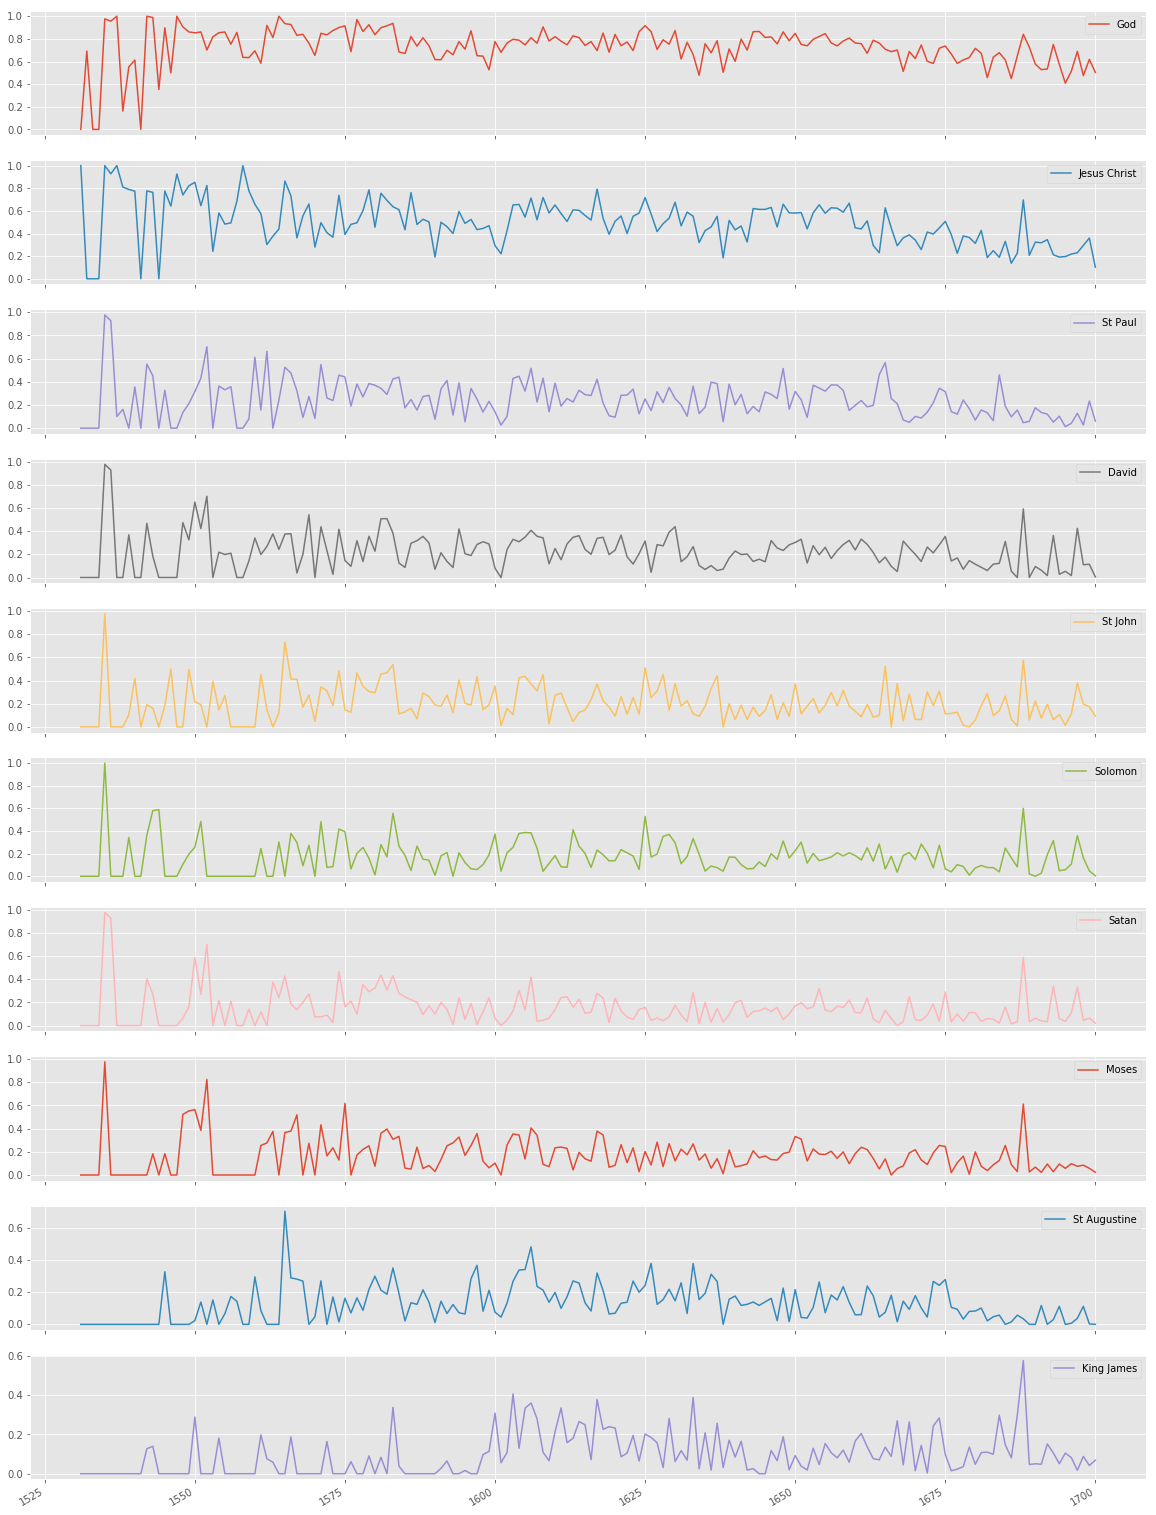

In [21]:
# The maximum range I could analyze was 1531-1700
# Create a dictionary of subgraphs for that range
graphs_by_year = {x:hf.filter_by_year(x,B) for x in range(1531,1701)}

# To analyze the people with the most connections, I need a sorted list of the highest degree-people.
nodes_by_degree = sorted(B.nodes(), key=lambda n:B.degree(n), reverse=True)
people_by_degree = [n for n in nodes_by_degree if type(n) == int]
top_people = people_by_degree[:10]

# To get the graph for the "projected degree" over time, I needed to
# project every subgraph and record the degree
degree_projected = {}

for year,G in graphs_by_year.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if type(n) == int}
    projected_G = bipartite.projected_graph(G, sub_people_nodes)
    degree_projected[year] = nx.degree_centrality(projected_G)
    
# Make a dataframe for easy graphing
df = hf.create_dataframe(degree_projected,top_people,B)
tf = df.T

# Create subplots for each person
ax = tf.plot(subplots=True, figsize=(20,30))

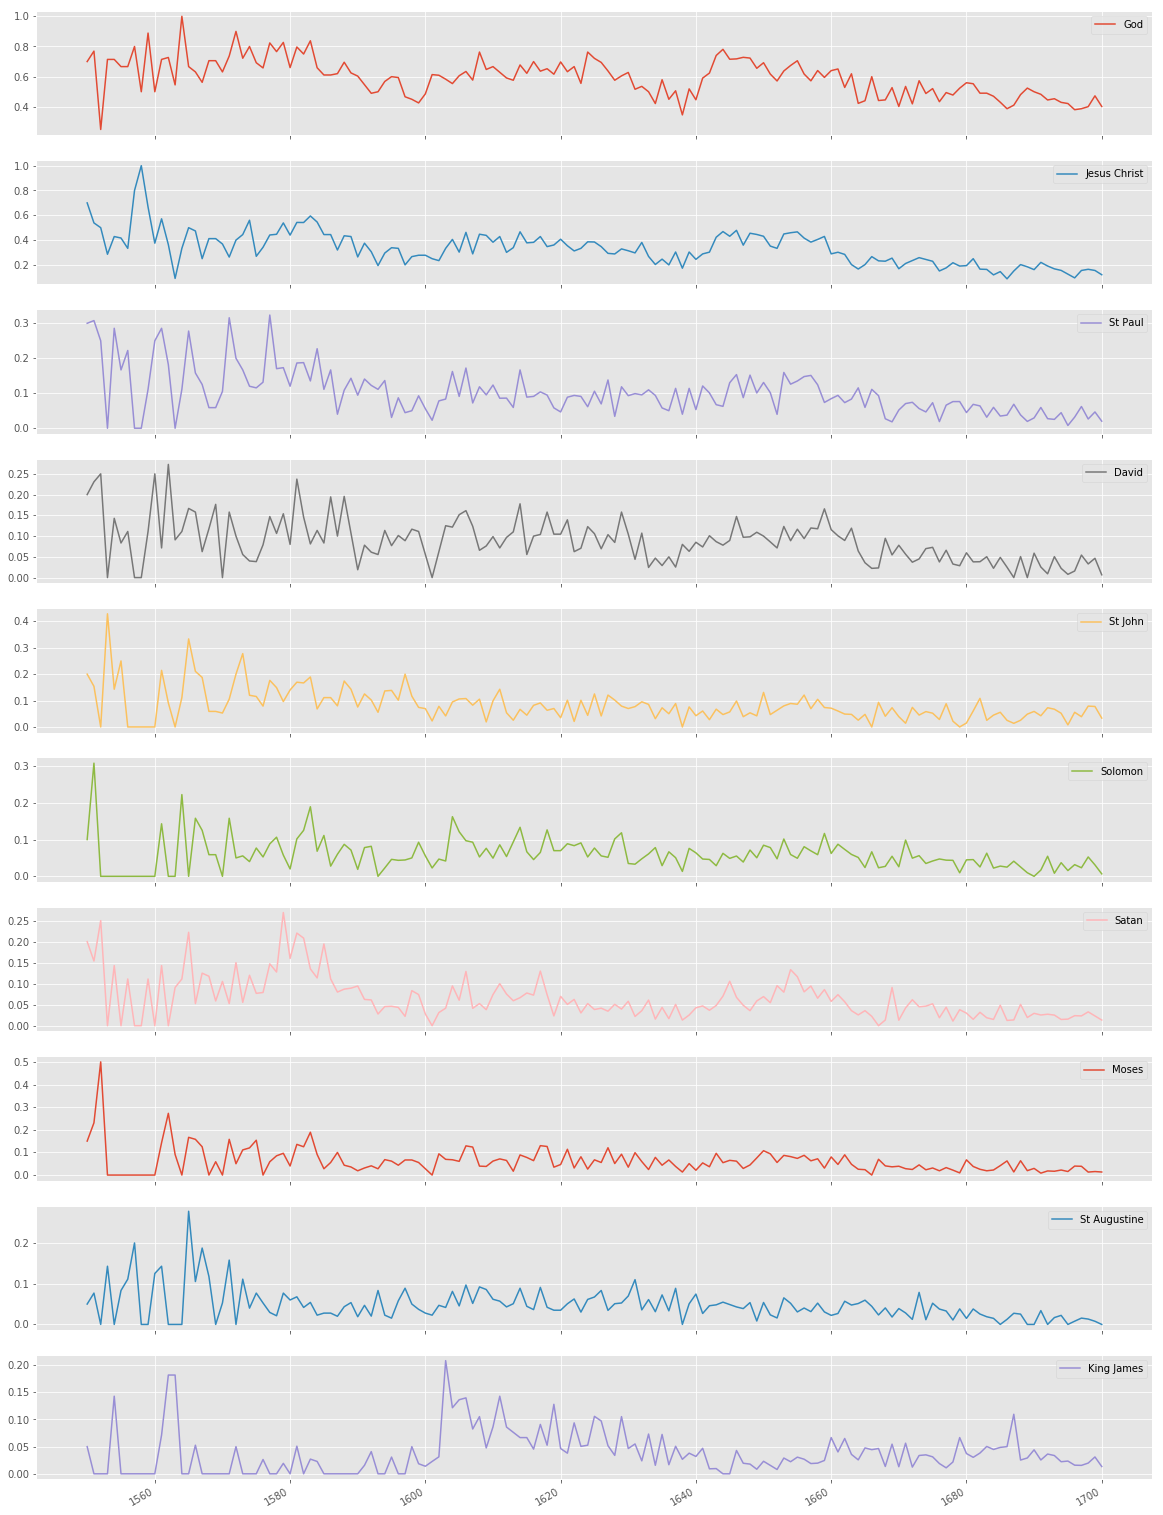

In [22]:
# The maximum range I could analyze was 1531-1700
# Create a dictionary of subgraphs for that range
graphs_by_year = {x:hf.filter_by_year(x,B) for x in range(1550,1701)}

# To analyze the people with the most connections, I need a sorted list of the highest degree-people.
nodes_by_degree = sorted(B.nodes(), key=lambda n:B.degree(n), reverse=True)
people_by_degree = [n for n in nodes_by_degree if type(n) == int]
top_people = people_by_degree[:10]

# To get the graph for the "projected degree" over time, I needed to
# project every subgraph and record the degree
dc_by_year = {}

for year,G in graphs_by_year.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if type(n) == int}
#     print(year,G.nodes())
    dc = bipartite.degree_centrality(G,sub_people_nodes)
    dc_by_year[year] = dc
    
# Make a dataframe for easy graphing
df = hf.create_dataframe(dc_by_year,top_people,B)
tf = df.T

# Create subplots for each person
ax = tf.plot(subplots=True, figsize=(20,30))

In [15]:
bc_by_year = {}

for year,G in graphs_by_year.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if type(n) == int}
#     print(year,G.nodes())
    bc = bipartite.betweenness_centrality(G,sub_people_nodes)
    bc_by_year[year] = bc
    
# Make a dataframe for easy graphing
df = hf.create_dataframe(bc_by_year,top_people,B)
tf = df.T

# Create subplots for each person
ax = tf.plot(subplots=True, figsize=(20,30))

KeyboardInterrupt: 

Consider the degree of Queen Elizabeth (in green on the graph above). Variations on her name appear throughout the corpus, beginning as Princess Elizabeth before her reign and hitting a high point in the decade before her death. Her degree from 1595 to 1603 is 163, outstripping perennially common names such as St. Augustine and St. Paul. Significantly, Elizabeth's influence does not decrease as much after her death as one would think: she remains in or near the top 10 nodes by degree all the way through 1640s and 50s. Similarly, in the 1590s and early 1600s, for example, the increased centrality of Luther, Calvin, and Hus signals a growing market for Protestant texts in the late part of Elizabeth's reign as well as an increase in the desire among authors to curry social favor by espousing interest in major Protestant thinkers. The social concerns of dedicatory practice and the economic ones are inextricably linked—by viewing texts and names together we get a better sense of the way these two drivers for dedicatory naming overlap.

Beyond the transhistorical importance of specific names and texts, the same data can be used to address the question of changes in dedicatory practice over time. The best test case for this is the period spanning from the 1630s through the 1660s. How did political upheaval change dedicatory practice and, by extension, the literary networks of the seventeenth century? Slicing the network by decade instead of by year makes this kind of analysis possible.

By degree:

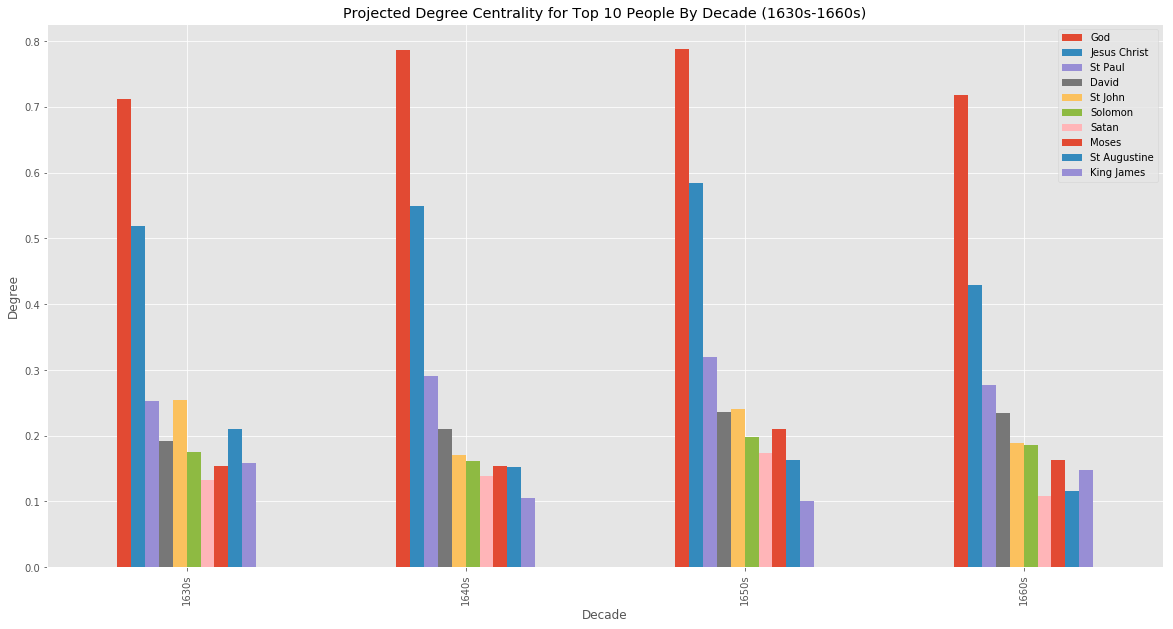

In [23]:
# Create a subgraph for decades around the Civil War/Interregnum period (and immediately before and after)
decade_graphs = {'1630s':hf.filter_by_range(1630,1639,B),
                 '1640s':hf.filter_by_range(1639,1649,B), 
                 '1650s':hf.filter_by_range(1650,1659,B), 
                 '1660s':hf.filter_by_range(1660,1669,B)
                }

# Find centralities by decade
decade_centralities = {}
    
for year,G in decade_graphs.items():
    sub_people_nodes = {n for n, d in G.nodes(data=True) if type(n) == int}
    projected_G = bipartite.projected_graph(G, sub_people_nodes)
    decade_centralities[year] = nx.degree_centrality(projected_G)
        
# Create a dataframe for the top ten people (but eliminate Christ and St. Paul for readability)
dbdf = hf.create_dataframe(decade_centralities,top_people,B)
tdbdf = dbdf.T
# Plot as a bar graph instead of a line graph
ax = tdbdf.plot(kind='bar', figsize=(20,10), title="Projected Degree Centrality for Top 10 People By Decade (1630s-1660s)")
ax.set_xlabel('Decade')
ax.set_ylabel('Degree')
plt.legend()#loc='center left', bbox_to_anchor=(1.0, 0.5))  


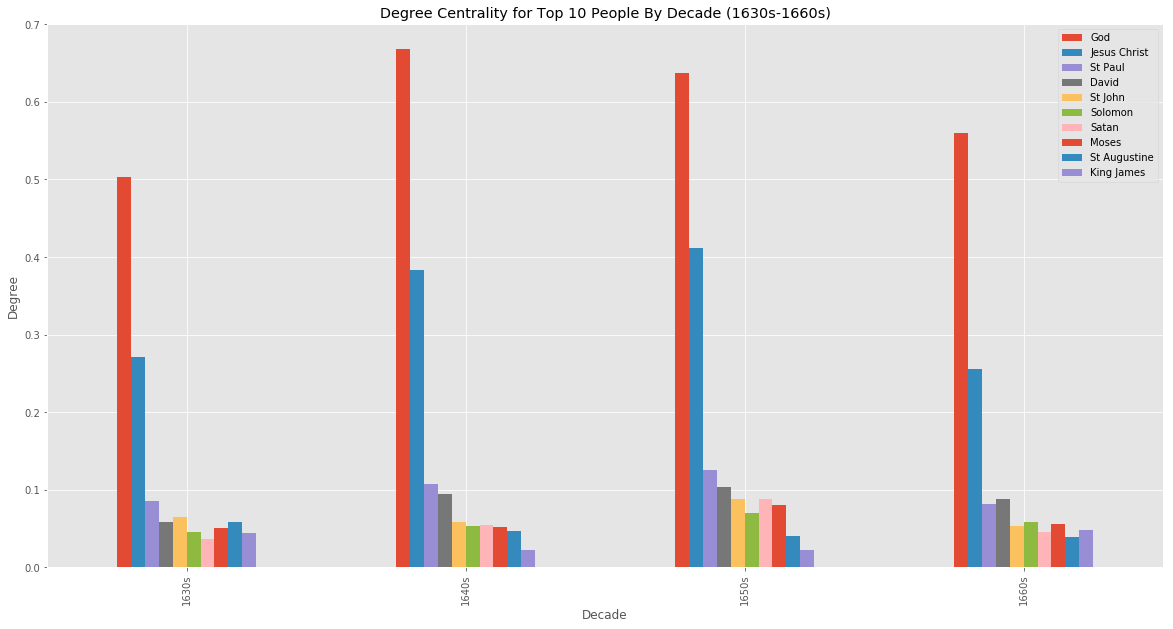

In [24]:
# Create a subgraph for decades around the Civil War/Interregnum period (and immediately before and after)
decade_graphs = {'1630s':hf.filter_by_range(1630,1639,B),
                 '1640s':hf.filter_by_range(1639,1649,B), 
                 '1650s':hf.filter_by_range(1650,1659,B), 
                 '1660s':hf.filter_by_range(1660,1669,B)
                }

# Find centralities by decade
decade_centralities = {year:bipartite.degree_centrality(G, {n for n, d in G.nodes(data=True) if type(n) == int}) for year,G in decade_graphs.items()}
        
# Create a dataframe for the top ten people (but eliminate Christ and St. Paul for readability)
dbdf = hf.create_dataframe(decade_centralities,top_people, B)
tdbdf = dbdf.T
# Plot as a bar graph instead of a line graph
ax = tdbdf.plot(kind='bar', figsize=(20,10), title="Degree Centrality for Top 10 People By Decade (1630s-1660s)")
ax.set_xlabel('Decade')
ax.set_ylabel('Degree')
plt.legend()#loc='center left', bbox_to_anchor=(1.0, 0.5))  

By betweenness centrality:

In [13]:
# Need the itemgetter module for easier sorting
from operator import itemgetter
import pickle as pkl

# Import all the betweenness measures from a file I created earlier
with open('all_betweenness.pkl', 'rb') as newf:
    all_betweenness = pkl.load(newf)

people_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==1}
# Get betweenness for just the people nodes and sort them
all_betweenness_people = {k:v for k,v in all_betweenness.items() if k in people_nodes}
all_betweenness_sorted = sorted(all_betweenness_people.items(), key=itemgetter(1), reverse=True)

# Keep track of the ids and get the top ten nodes by betweenness
abs_ids = [a[0] for a in all_betweenness_sorted[:10]]
top_ten_betweenness = []
for a in abs_ids:
    for n in B.nodes(data=True):
        if n[0] == a:
            top_ten_betweenness.append(n)

with open('decade_betweenness.pkl', 'rb') as newf:
    decade_betweenness = pkl.load(newf)
    
# Create a datagrame and graph these results (eliminate Christ for readability)
ddf = hf.create_dataframe(decade_betweenness,top_ten_betweenness[1:])
tddf = ddf.T
ax = tddf.plot(kind='bar', figsize=(20,10), title="Betweenness Centrality for Top 10 People By Decade (1630s-1660s)")
ax.set_xlabel('Decade')
ax.set_ylabel('Betweenness Centrality')
plt.legend()#loc='lower center')#, bbox_to_anchor=(0.5, 1.0))

FileNotFoundError: [Errno 2] No such file or directory: 'all_betweenness.pkl'